<a href="https://www.kaggle.com/code/marcosl86/analisis-de-ventas-de-llantas?scriptVersionId=126683075" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Importación de librerías...
import pandas as pd
import numpy as np
import datetime
import locale

import plotly
import plotly.graph_objs as go
#las siguientes lineas permiten guardar las gráficas
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#para poder imprimir la gráfica directamente en el notebook utilizamos...
init_notebook_mode(connected=True)#esto es lo que hace que salga la gráfica en el jupyter.
import plotly.graph_objs as go
import plotly.express as px

from IPython.display import display, HTML, Markdown, Image
    
#ver gamas de colores
#fig = px.colors.sequential.swatches_continuous()
#fig.show()


#Configuraciones varias
#servira para representar mejor los miles
trans = str.maketrans('.,', ',.')
#visualizar tablas completas
pd.options.display.float_format = '{: ,.0f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

# Idioma "es-ES" (código para el español de España) #No soportado en este notebook
a = locale.setlocale(locale.LC_ALL, '')
import matplotlib.pyplot as plt
%matplotlib inline  


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-venta-de-llantas/dataset Venta de Llantas.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/dataset-venta-de-llantas/dataset Venta de Llantas.xlsx', sheet_name='Hoja1')
df.head()

IdCliente             NombreCliente      Fecha  Empleado   Referencia  \
0  C1070956433                PINTO JOHN 2016-09-01        24   LL-2R-0038   
1  C1032372566                CESAR CRUZ 2016-09-01        14  LL-TCA-0133   
2     C2865810              PINEDA JAIME 2016-09-01        12  LL-TCA-0019   
3    C11210285  VILLALBA RODRIGUEZ FABIO 2016-09-01        24  LL-TCA-0009   
4    C80755314             MOLINA RONALD 2016-09-01        14  LL-TCA-0132   

              Descripcion  CodigoFamilia Familia  Cantidad   Ventas  \
0  PILOT STREET 110/80-17            101  LLANTA         1  129,310   
1       TOURING 175/70R13            101  LLANTA         2  181,034   
2    ENERGY XM2 185/65R14            101  LLANTA         1  193,095   
3    ENERGY XM2 165/65R13            101  LLANTA         2  262,069   
4             NO UTILIZAR            101  LLANTA         4  362,069   

       Localidad       Sede  Area  
0  Puente aranda   Calle 13    35  
1           Suba       Suba    32  
2        Usaquen  Santa ana    33  
3  Puente aranda   Calle 13    35  
4           Suba       Suba    32

In [3]:
# Revisamos la cantidad de filas, y columnas con la cuenta el Dataset
print(df.shape)

# Observamos que tipo de datos son
print(df.dtypes)

# Observamos información sobre los datos
print(df.info())

(127266, 13)
IdCliente                object
NombreCliente            object
Fecha            datetime64[ns]
Empleado                float64
Referencia               object
Descripcion              object
CodigoFamilia           float64
Familia                  object
Cantidad                float64
Ventas                  float64
Localidad                object
Sede                     object
Area                    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127266 entries, 0 to 127265
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   IdCliente      127255 non-null  object        
 1   NombreCliente  127255 non-null  object        
 2   Fecha          127255 non-null  datetime64[ns]
 3   Empleado       127255 non-null  float64       
 4   Referencia     127255 non-null  object        
 5   Descripcion    127255 non-null  object        
 6   CodigoFamilia  127255 non

## ANÁLISIS DE NULOS

In [4]:
# Analisis de Nulos
df.isna().sum().sort_values(ascending = False)

IdCliente        11
NombreCliente    11
Fecha            11
Empleado         11
Referencia       11
Descripcion      11
CodigoFamilia    11
Familia          11
Cantidad         11
Ventas           11
Localidad        11
Area             11
Sede             10
dtype: int64

In [5]:
#observamos un poco que son estos datos nulos
df[df['IdCliente'].isna()].head(15)

IdCliente NombreCliente Fecha  Empleado Referencia Descripcion  \
127255       NaN           NaN   NaT       NaN        NaN         NaN   
127256       NaN           NaN   NaT       NaN        NaN         NaN   
127257       NaN           NaN   NaT       NaN        NaN         NaN   
127258       NaN           NaN   NaT       NaN        NaN         NaN   
127259       NaN           NaN   NaT       NaN        NaN         NaN   
127260       NaN           NaN   NaT       NaN        NaN         NaN   
127261       NaN           NaN   NaT       NaN        NaN         NaN   
127262       NaN           NaN   NaT       NaN        NaN         NaN   
127263       NaN           NaN   NaT       NaN        NaN         NaN   
127264       NaN           NaN   NaT       NaN        NaN         NaN   
127265       NaN           NaN   NaT       NaN        NaN         NaN   

        CodigoFamilia Familia  Cantidad  Ventas Localidad Sede  Area  
127255            NaN     NaN       NaN     NaN       NaN  NaN   NaN  
127256            NaN     NaN       NaN     NaN       NaN  NaN   NaN  
127257            NaN     NaN       NaN     NaN       NaN  NaN   NaN  
127258            NaN     NaN       NaN     NaN       NaN  NaN   NaN  
127259            NaN     NaN       NaN     NaN       NaN  NaN   NaN  
127260            NaN     NaN       NaN     NaN       NaN  NaN   NaN  
127261            NaN     NaN       NaN     NaN       NaN  NaN   NaN  
127262            NaN     NaN       NaN     NaN       NaN  NaN   NaN  
127263            NaN     NaN       NaN     NaN       NaN  NaN   NaN  
127264            NaN     NaN       NaN     NaN       NaN  NaN   NaN  
127265            NaN     NaN       NaN     NaN       NaN        NaN

In [6]:
#Eliminamos del dataset estos valores nulos
df.dropna(axis=0, how='all', inplace=True )
df.shape
df.drop(index=127265, inplace=True)

In [7]:
#Volvemos a ver los nulos
df.isna().sum().sort_values(ascending = False)

IdCliente        0
NombreCliente    0
Fecha            0
Empleado         0
Referencia       0
Descripcion      0
CodigoFamilia    0
Familia          0
Cantidad         0
Ventas           0
Localidad        0
Sede             0
Area             0
dtype: int64

## Revisamos información sobre datos duplicados

In [8]:
#Revisamos información sobre datos duplicados
df[df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18461 entries, 18 to 127186
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   IdCliente      18461 non-null  object        
 1   NombreCliente  18461 non-null  object        
 2   Fecha          18461 non-null  datetime64[ns]
 3   Empleado       18461 non-null  float64       
 4   Referencia     18461 non-null  object        
 5   Descripcion    18461 non-null  object        
 6   CodigoFamilia  18461 non-null  float64       
 7   Familia        18461 non-null  object        
 8   Cantidad       18461 non-null  float64       
 9   Ventas         18461 non-null  float64       
 10  Localidad      18461 non-null  object        
 11  Sede           18461 non-null  object        
 12  Area           18461 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 2.0+ MB


In [9]:
df.columns

Index(['IdCliente', 'NombreCliente', 'Fecha', 'Empleado', 'Referencia',
       'Descripcion', 'CodigoFamilia', 'Familia', 'Cantidad', 'Ventas',
       'Localidad', 'Sede', 'Area'],
      dtype='object')

In [10]:
## Convertimos a columnas de enteros, algunas columnas que han sido leidas como flotantes.
df[['Empleado', 'CodigoFamilia', 'Cantidad', 'Area']] = df[['Empleado', 'CodigoFamilia', 'Cantidad', 'Area']].astype('int64')

In [11]:
df.head()

IdCliente             NombreCliente      Fecha  Empleado   Referencia  \
0  C1070956433                PINTO JOHN 2016-09-01        24   LL-2R-0038   
1  C1032372566                CESAR CRUZ 2016-09-01        14  LL-TCA-0133   
2     C2865810              PINEDA JAIME 2016-09-01        12  LL-TCA-0019   
3    C11210285  VILLALBA RODRIGUEZ FABIO 2016-09-01        24  LL-TCA-0009   
4    C80755314             MOLINA RONALD 2016-09-01        14  LL-TCA-0132   

              Descripcion  CodigoFamilia Familia  Cantidad   Ventas  \
0  PILOT STREET 110/80-17            101  LLANTA         1  129,310   
1       TOURING 175/70R13            101  LLANTA         2  181,034   
2    ENERGY XM2 185/65R14            101  LLANTA         1  193,095   
3    ENERGY XM2 165/65R13            101  LLANTA         2  262,069   
4             NO UTILIZAR            101  LLANTA         4  362,069   

       Localidad       Sede  Area  
0  Puente aranda   Calle 13    35  
1           Suba       Suba    32  
2        Usaquen  Santa ana    33  
3  Puente aranda   Calle 13    35  
4           Suba       Suba    32

## Analisis Exploratorio de Variables Categoricas

In [12]:

#Convertimos primero variables obejto a categóricas
columnas_categoricas = ['Empleado','CodigoFamilia','Familia','Localidad', 'Sede','Area']
df[columnas_categoricas]=df[columnas_categoricas].astype('category')
df.dtypes

IdCliente                object
NombreCliente            object
Fecha            datetime64[ns]
Empleado               category
Referencia               object
Descripcion              object
CodigoFamilia          category
Familia                category
Cantidad                  int64
Ventas                  float64
Localidad              category
Sede                   category
Area                   category
dtype: object

In [13]:
#Analisis explotarorio de datos categóricos o de tipo object
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

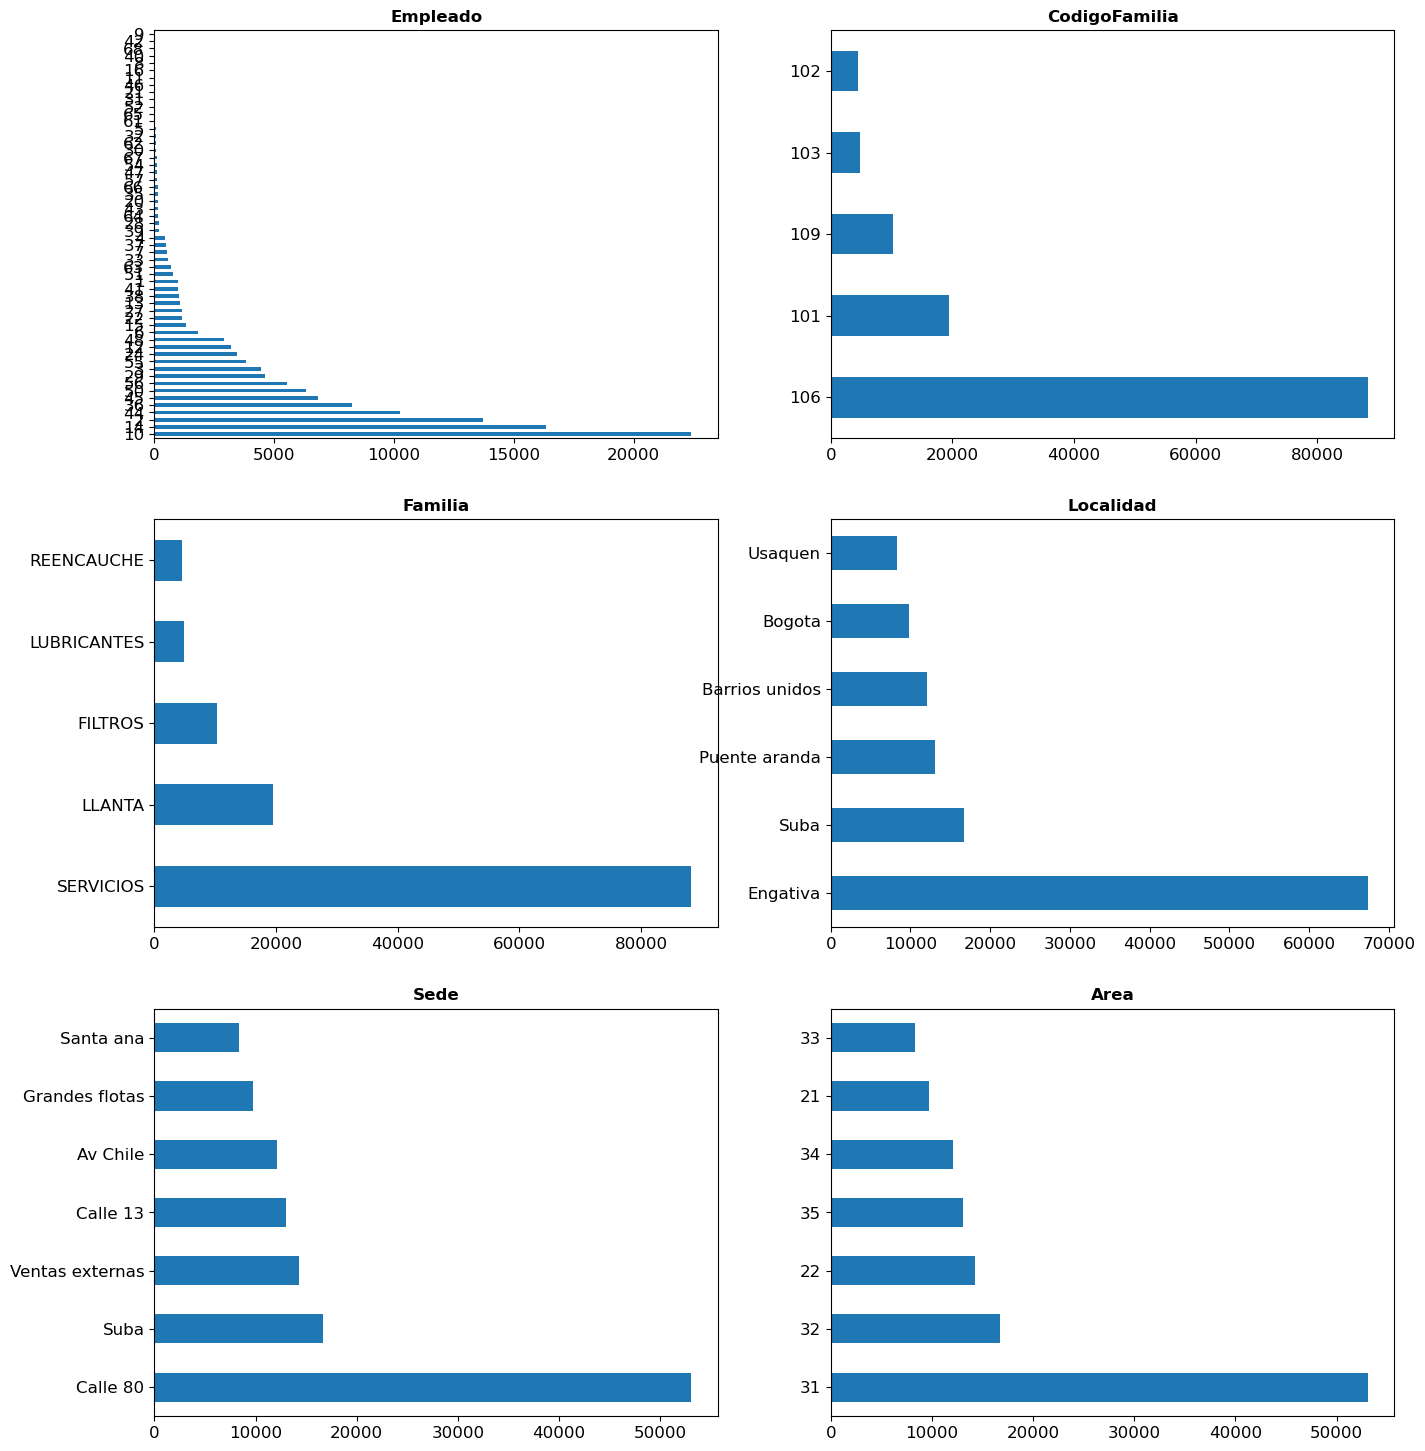

In [14]:
# Graficamos a grandes rasgos las variables categoricas
graficos_eda_categoricos(df[columnas_categoricas])

#### No se muestran los datos referentes a clientes y a descripción, por la cantidad de valores únicos que poseen

## Exploratorio de Datos Numéricos

In [15]:
#Exploratorio de Datos Numéricos
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

estadisticos_cont(df.select_dtypes('number'))

count     mean  median        std  min     25%     50%     75%  \
Cantidad  127,255        2       1         11    1       1       1       2   
Ventas    127,255  584,858  29,412  3,251,382  130  12,605  29,412  51,724   

                  max  
Cantidad          971  
Ventas    220,224,601

## Analisis de Datos y obtención de algunos Insights

In [16]:
# Definimos la función de diagrama de pareto, que la utilizarmos en varias ocasiones
def pareto_chart_sum(dataframe,column,value, titulo):
    df = dataframe.copy()
    df[column] = df[column].astype('category')
    
    df = pd.pivot_table(dataframe,
               values = value,
               index=column,
               #columns = column,
               aggfunc={value:pd.Series.sum})
    
    df = df.sort_values(by=value, ascending=False).copy()
    
    df['cumporc']=df[value].cumsum()/df[value].sum()*100
    
    
    from plotly.subplots import make_subplots

    trace_0 = go.Bar(
        x=df.index,
        y=df[value],
    )
    trace_1 = go.Scatter(
        x=df.index,
        y=df['cumporc'],
        mode="markers+lines",
        marker_color='indianred'
    )

    fig = go.Figure()
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    fig.add_trace(trace_0, secondary_y=False)
    fig.add_trace(trace_1, secondary_y=True)

    fig.update_yaxes(title_text=f"<b>Total de {value}</b>", secondary_y=False, rangemode="tozero" )
    fig.update_yaxes(title_text="<b>cumporc</b>", secondary_y=True, rangemode="tozero")
    fig.update_xaxes(type='category')

    fig.update_layout(
        title=f'{titulo}',
    )

    fig.show()  
    display(df.head(15))
    #return fig

In [17]:
## Analisis respecto a montos totales de V

In [18]:
#Analisis de Datos

for col in columnas_categoricas:
    pareto_chart_sum(df, col, 'Ventas', f'{col}s que más suman en ventas')


Ventas  cumporc
Empleado                         
2         34,634,177,117       47
3         10,643,200,934       61
1          5,718,322,655       69
29         3,315,858,502       73
6          2,265,003,991       76
10         1,959,424,644       79
45         1,900,067,508       81
14         1,411,594,725       83
41         1,137,609,746       85
36         1,110,538,991       86
50         1,056,605,105       88
44           926,489,144       89
48           889,382,001       90
12           833,890,804       91
7            654,712,399       92

Ventas  cumporc
CodigoFamilia                         
101            54,859,167,274       74
106            11,266,569,989       89
102             7,813,536,785       99
103               314,205,968      100
109               172,601,580      100

Ventas  cumporc
Familia                             
LLANTA       54,859,167,274       74
SERVICIOS    11,266,569,989       89
REENCAUCHE    7,813,536,785       99
LUBRICANTES     314,205,968      100
FILTROS         172,601,580      100

Ventas  cumporc
Localidad                              
Engativa        51,797,132,608       70
Bogota          12,408,960,022       86
Barrios unidos   3,393,520,053       91
Puente aranda    2,942,281,891       95
Usaquen          2,409,422,995       98
Suba             1,474,764,027      100

Ventas  cumporc
Sede                                    
Ventas externas  44,786,548,709       60
Grandes flotas   12,408,960,022       77
Calle 80          7,010,583,899       86
Av Chile          3,393,520,053       91
Calle 13          2,942,281,891       95
Santa ana         2,409,422,995       98
Suba              1,474,764,027      100

Ventas  cumporc
Area                         
22    44,786,548,709       60
21    12,408,960,022       77
31     7,010,583,899       86
34     3,393,520,053       91
35     2,942,281,891       95
33     2,409,422,995       98
32     1,474,764,027      100

## TOP 15 DE CLIENTES QUE MAS GENERA... Y TOP 15 DE DESCRIPCION QUE MÁS GENERA

In [19]:
for col in ['IdCliente', 'Descripcion']:
    pareto_chart_sum(df, col, 'Ventas', f'{col}s que más suman en ventas')

Ventas  cumporc
IdCliente                         
C900364615  6,658,875,502        9
C830060151  5,880,104,403       17
C800035276  4,808,798,364       23
C890930545  4,312,455,400       29
C860054978  4,238,321,590       35
C860025900  3,898,818,344       40
C900365651  3,427,390,164       45
C860005986  1,690,231,517       47
C891100881  1,407,125,848       49
C805025780  1,299,068,196       51
C900069712  1,231,420,562       52
C900771273  1,170,363,409       54
C830092876    974,472,880       55
C19146113     923,547,649       56
C860002175    897,847,594       58

Ventas  cumporc
Descripcion                                                       
X INCITY XZU3+ 295/80R22.5                  8,674,975,426       12
X MULTI Z 295/80R22.5                       4,110,889,761       17
X MULTI D 295/80R22.5                       3,673,392,720       22
X MULTI D2 295/80R22.5                      2,743,287,139       26
X WORKS XDY 12R22.5                         1,878,691,501       28
XZE2 215/75 R17.5                           1,674,287,090       31
X MULTI Z 235/75R17.5                       1,577,162,742       33
CONTRATO DE SERVICIOS/ COSTO POR KILOMETRO  1,564,501,971       35
ST250 295/80R22.5                           1,463,993,243       37
X INCITY XZU3 215/75R17.5                   1,252,255,372       38
CONTRATO DE SERVICIOS /ALPINA               1,218,559,903       40
X MULTI T 295/80R22.5                       1,203,721,053       42
X WORKS XZY 12R22.5                         1,202,177,094       43
ALINEACION                                  1,129,130,731       45
REENC XZE2 295/80 R 22.5                      897,481,557       46

## Analisis respecto a cantidades

In [20]:
for col in columnas_categoricas:
    pareto_chart_sum(df, col, 'Cantidad', f'{col}s que más suman mas cantidades')

Cantidad  cumporc
Empleado                   
2            78142       25
10           33855       36
14           28981       45
29           27159       53
44           15754       58
3            14714       63
1            13401       67
45           13356       72
36           13110       76
50            9600       79
24            9463       82
56            8913       85
55            6664       87
12            6195       89
48            6045       91

Cantidad  cumporc
CodigoFamilia                   
106              211323       67
101               71601       90
102               16943       95
109               10368       98
103                4832      100

Cantidad  cumporc
Familia                       
SERVICIOS      211323       67
LLANTA          71601       90
REENCAUCHE      16943       95
FILTROS         10368       98
LUBRICANTES      4832      100

Cantidad  cumporc
Localidad                        
Engativa          154033       49
Bogota             66450       70
Suba               29749       79
Puente aranda      24327       87
Barrios unidos     23398       95
Usaquen            17110      100

Cantidad  cumporc
Sede                              
Calle 80            80923       26
Ventas externas     73110       49
Grandes flotas      66450       70
Suba                29749       79
Calle 13            24327       87
Av Chile            23398       95
Santa ana           17110      100

Cantidad  cumporc
Area                   
31       80923       26
22       73110       49
21       66450       70
32       29749       79
35       24327       87
34       23398       95
33       17110      100

In [21]:
for col in ['IdCliente', 'Descripcion']:
    pareto_chart_sum(df, col, 'Cantidad', f'{col}s que más Cantidad')

Cantidad  cumporc
IdCliente                    
C830060151     31752       10
C900365651      9288       13
C900298305      8710       16
C860040576      8180       18
C900771273      6674       21
C890930545      6630       23
C860054978      5760       24
C860002127      5044       26
C901230629      5006       28
C800035276      4862       29
C900364615      4455       31
C900912827      4188       32
C890211325      3389       33
C901230687      3232       34
C860025900      3217       35

Cantidad  cumporc
Descripcion                                                    
BALANCEO AUTO                                    31466       10
ALINEACION                                       15395       15
BALANCEO CAMIONETA                               13530       19
ROTACION LLANTA CON DESMONTE DE RIN              10370       22
ALINEACION AUTO                                  10160       26
CONTRATO DE SERVICIOS / SI-99                     9278       29
REPARACION MENOR DE LLANTA (DESPINCHE ) TACO      7045       31
X INCITY XZU3+ 295/80R22.5                        6135       33
ROTACION LLANTAS CAMION                           5676       35
ROTACION LLANTA  SIN DESMONTE DE RIN              5387       36
CALIBRACION CON NITROGENO                         5239       38
ALINEACION CAMIONETA                              5205       40
REPARACION MENOR (DESPINCHE)                      4991       41
CAMBIO DE ACEITE                                  4957       43
BALANCEO                                          4873       44

## Analisis de las ventas en el tiempo

In [22]:
#Analisis en cuanto a Tiempos

print('Primera Fecha: ', df['Fecha'].min())
print('Ultima Fecha: ', df['Fecha'].max())
print('Periodo de Análisis: ', (df['Fecha'].max()-df['Fecha'].min()) )


Primera Fecha:  2016-09-01 00:00:00
Ultima Fecha:  2020-03-10 00:00:00
Periodo de Análisis:  1286 days 00:00:00


In [23]:
df['anio']=df['Fecha'].dt.year
df['mes']=df['Fecha'].dt.month
df['dia']=df['Fecha'].dt.day
df['dia_semana']=df['Fecha'].dt.day_name()

## Compartivo entre meses de todos los años del periodo

In [24]:
#Calculando el total
comparativo_anios = pd.pivot_table(df,
                        values = 'Ventas',
                        columns=['mes'],
                        index = ['anio'],
                        aggfunc={'Ventas':pd.Series.sum},
                        ).replace(np.nan, 0)
comparativos_anios_en_millones = comparativo_anios/1000000
comparativos_anios_en_millones.columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Setiembre', 'Octubre', 'Noviembre', 'Diciembre']
comparativos_anios_en_millones.style.background_gradient(cmap='GnBu',).format(precision=1)




In [25]:
!pip install calplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8122 sha256=569f4bbb69bcdd15b5319c9d0c6ae0ba6c4fd6d058c2c93d69b6fa094a50e195
  Stored in directory: /root/.cache/pip/wheels/db/31/2a/dc37dcdca6ac75904dfe7b83afc8f3f992f561fbe8ba3ae895
Successfully built calplot


## Panorama general de como fueron las ventas durante el periodo analizado.

Aquellos días más oscuros, fueron aquellos en los que hubieron picos de venta.

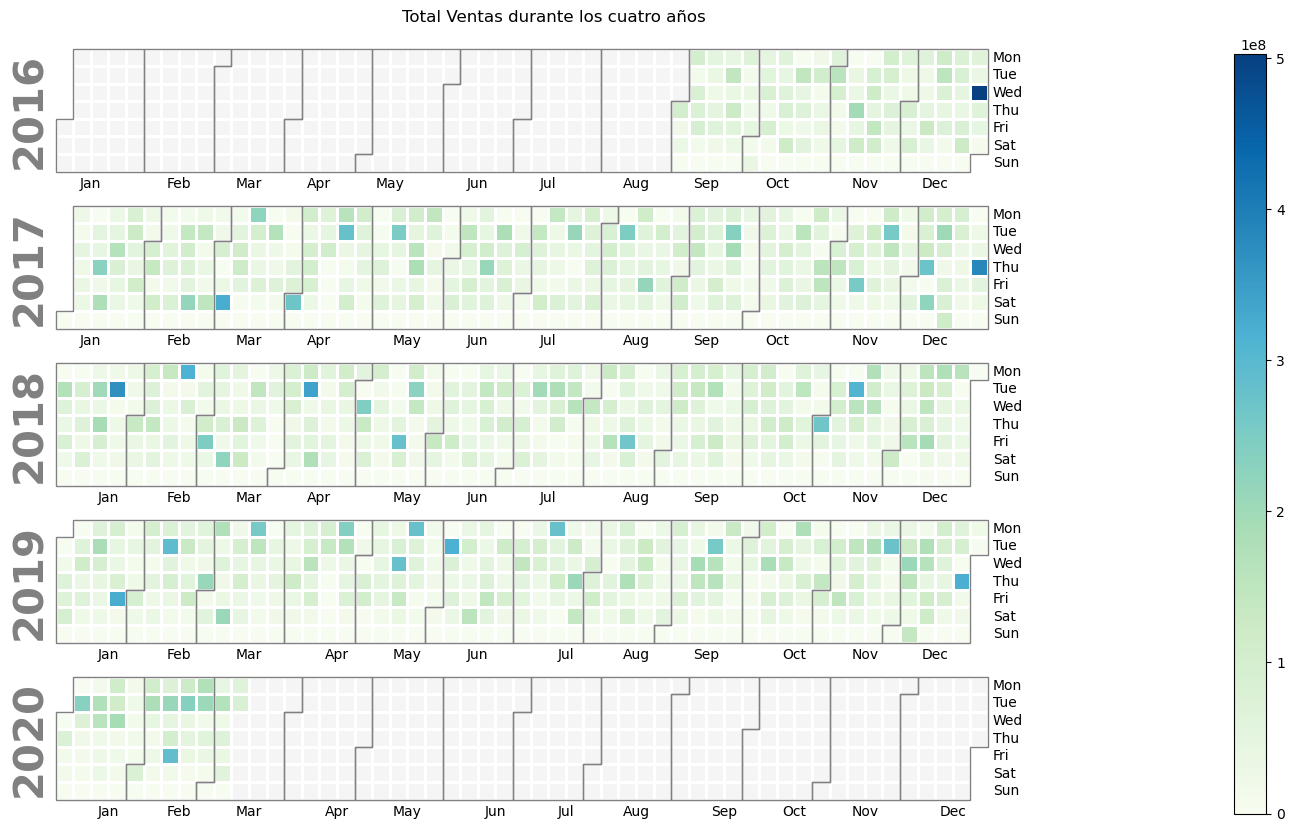

In [26]:
import calplot
calendary_map = df.set_index('Fecha')
pl1 = calplot.calplot(data = calendary_map['Ventas'], how = 'sum',
                      cmap = 'GnBu', figsize = (16, 8),
                      suptitle = "Total Ventas durante los cuatro años", )

In [27]:
#Visualizacion de Ventas durante el periodo
para_graf = df.set_index('Fecha').resample('M').sum()

from plotly.subplots import make_subplots

trace_0 = go.Bar(
    x=para_graf.index,
    y=para_graf['Ventas'],
)
trace_1 = go.Scatter(
    x=para_graf.index,
    y=para_graf['Cantidad'],
    mode="markers+lines",
    marker_color='indianred'
)

fig = go.Figure()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(trace_0, secondary_y=False)
fig.add_trace(trace_1, secondary_y=True)

fig.update_yaxes(title_text=f"<b>Total de Ventas</b>", secondary_y=False, rangemode="tozero" )
fig.update_yaxes(title_text="<b>cumporc</b>", secondary_y=True, rangemode="tozero")
fig.update_xaxes(type='category')

fig.update_layout(
    title=f'Cantidades y Ventas por mes durante todo el periodo',
)

fig.show()  
#display(para_graf.head(15))



## Comportamiento mes a mes, a fin de visualizar un poco cuales son algunos puntos más altos de ventas

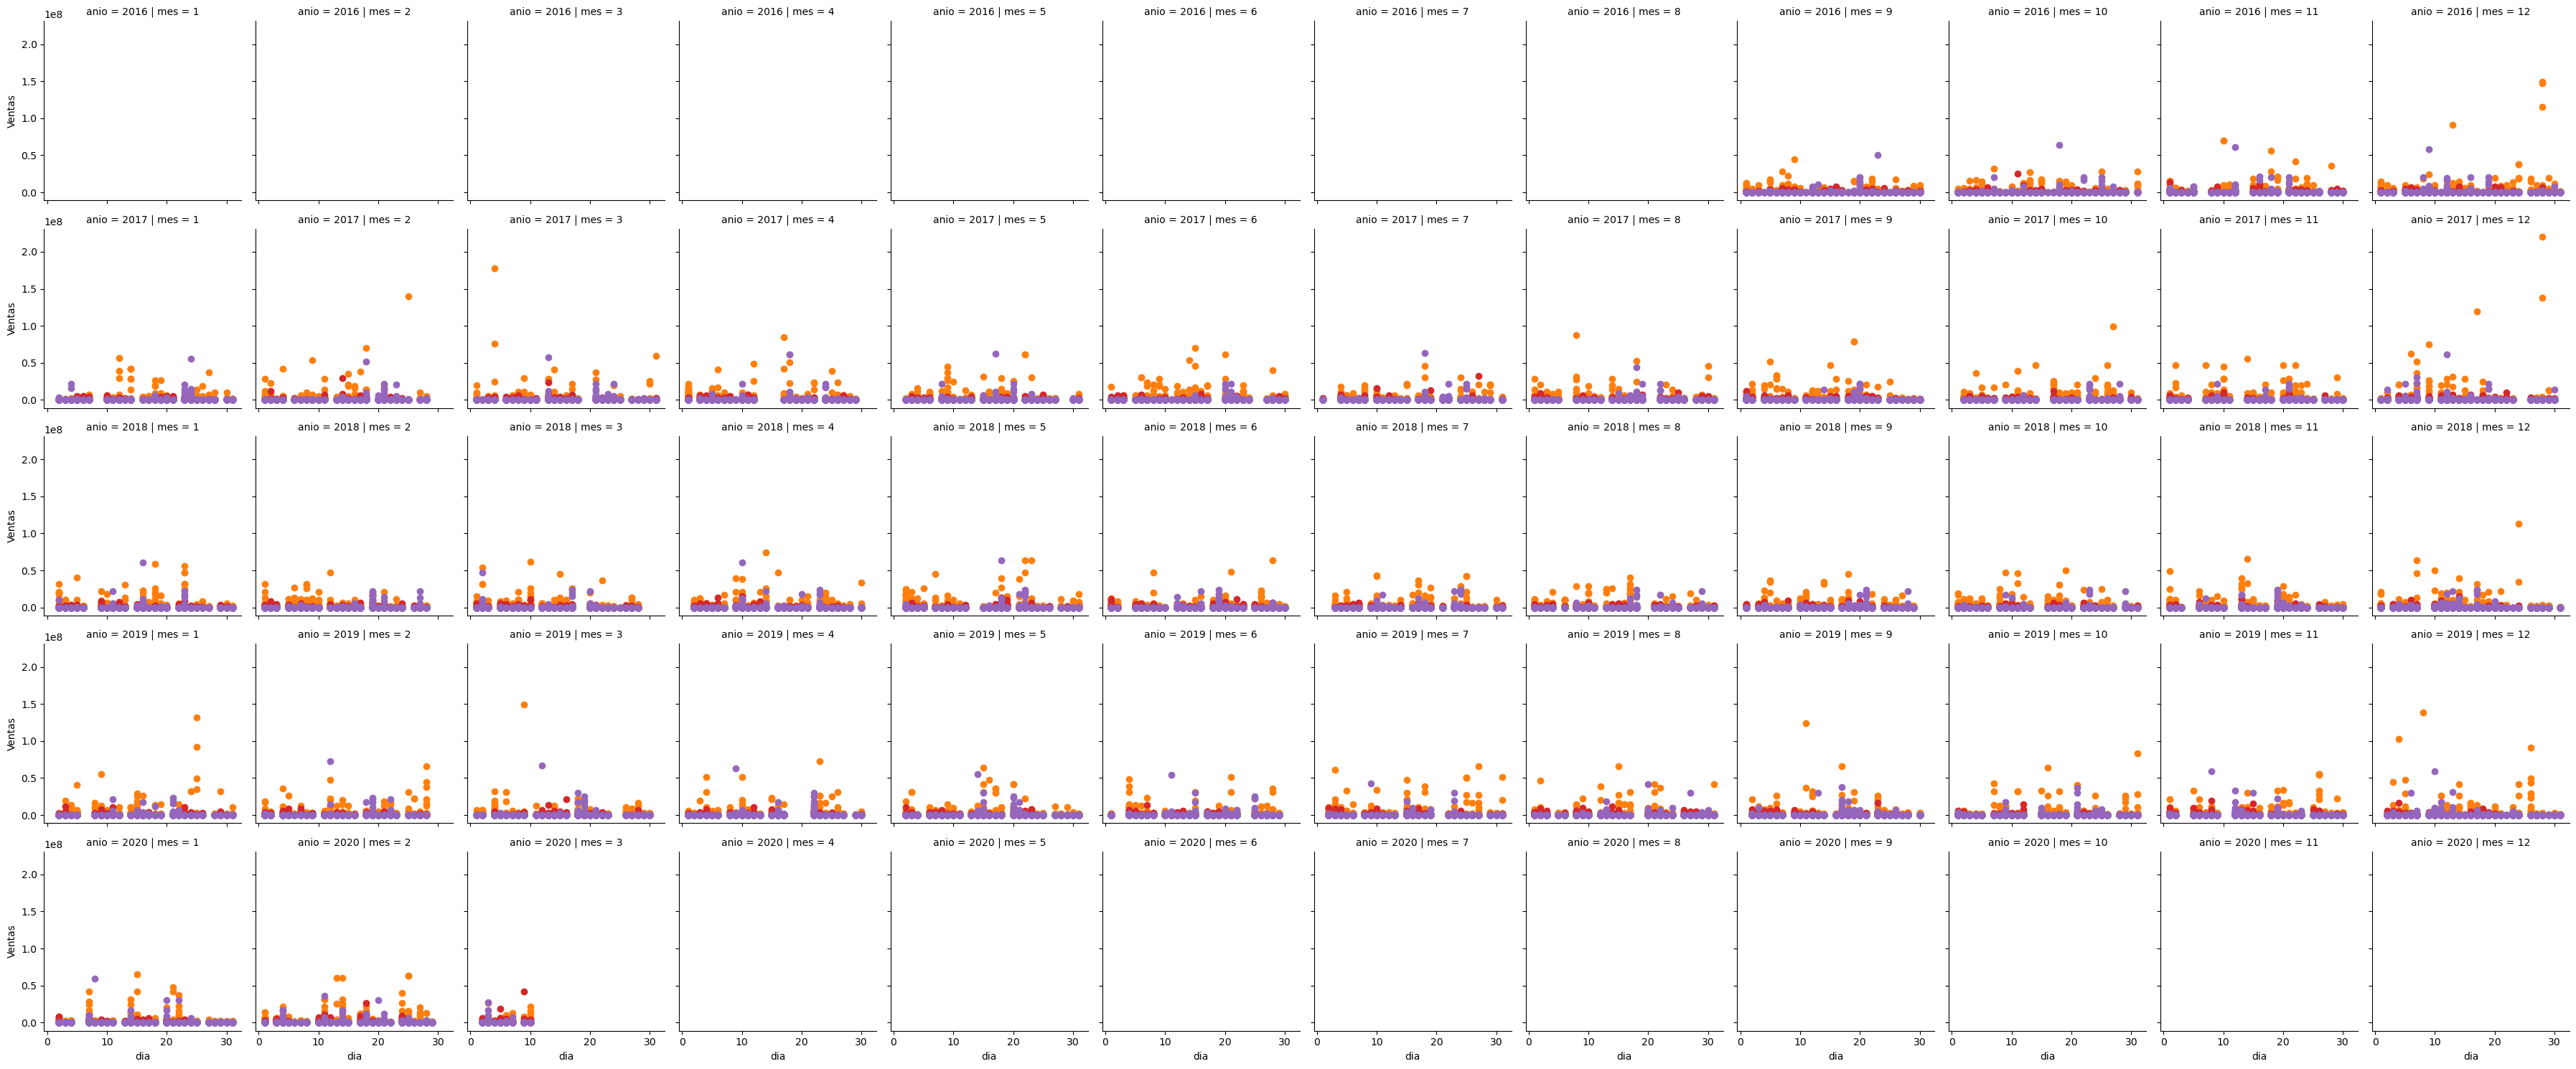

In [28]:
import seaborn as sns
g = sns.FacetGrid(df, row='anio', col='mes', hue='Familia')
g = g.map(plt.scatter,'dia','Ventas' )

In [29]:
for col in ['dia','mes','anio','dia_semana']:
    pareto_chart_sum(df, col, 'Cantidad', f'{col}s que más suman mas cantidades')

Cantidad  cumporc
dia                   
19      16876        5
21      14113       10
23      13723       14
22      13170       18
20      13117       23
18      12347       26
10      12108       30
17      11985       34
15      11763       38
12      11654       42
4       11499       45
14      10936       49
24      10493       52
16      10206       55
5       10142       58

Cantidad  cumporc
mes                   
12      40440       13
11      30694       23
10      29360       32
9       28990       41
1       28291       50
2       28080       59
3       24532       67
6       22231       74
8       21323       81
4       20982       87
5       20494       94
7       19650      100

Cantidad  cumporc
anio                   
2019     93151       30
2018     84867       57
2017     84512       83
2016     32665       94
2020     19872      100

Cantidad  cumporc
dia_semana                   
Tuesday        74017       23
Wednesday      52678       40
Monday         49170       56
Saturday       47684       71
Thursday       45580       85
Friday         44803      100
Sunday          1135      100

## Información repecto a que días, meses, años, días de la semana se generan más ingresos

In [30]:
for col in ['dia','mes','anio','dia_semana']:
    pareto_chart_sum(df, col, 'Ventas', f'{col}s que más suman mas Ventas')

Ventas  cumporc
dia                        
18   4,078,116,048        5
10   3,315,149,027       10
15   3,184,970,996       14
17   3,118,362,012       18
14   2,968,499,921       22
12   2,943,555,144       26
4    2,891,361,309       30
19   2,863,204,682       34
21   2,862,917,607       38
9    2,848,043,718       42
1    2,724,069,861       45
22   2,644,299,827       49
2    2,625,776,865       52
20   2,541,108,067       56
8    2,512,570,573       59

Ventas  cumporc
mes                        
12   8,991,449,748       12
11   7,341,059,653       22
2    7,147,821,265       32
9    6,718,051,176       41
1    6,553,467,079       49
10   6,440,762,121       58
3    5,685,445,682       66
4    5,343,201,087       73
5    5,139,605,573       80
7    5,090,258,615       87
8    5,016,022,749       93
6    4,958,936,848      100

Ventas  cumporc
anio                         
2017  21,622,983,348       29
2019  20,995,662,407       57
2018  20,653,428,245       85
2016   6,926,436,721       94
2020   4,227,570,875      100

Ventas  cumporc
dia_semana                         
Tuesday     17,601,216,315       24
Thursday    12,573,074,969       41
Wednesday   12,538,062,778       57
Friday      11,245,255,954       72
Monday      11,100,402,344       87
Saturday     9,043,037,920      100
Sunday         325,031,316      100

## Comparación entre empleados por montos vendidos según familia.

In [31]:
tabla_ventas = pd.pivot_table(df, values='Ventas',
                              index = ['Empleado', 'Familia'],
                              aggfunc = {'Ventas':'sum'}
                             )

In [32]:
empleados = df['Empleado'].unique().tolist()
for empleado in empleados[:10]:
    df_radar = tabla_ventas.loc[empleado].reset_index()
    fig = go.Figure(go.Scatterpolar(
        r=df_radar['Ventas'],
        theta=df_radar['Familia'],
        fill='toself',
        name=f'Empleado Id: {empleado}'
    ),)
    display(fig)


## Comparación entre empleados

In [33]:
fig = go.Figure()
for empleado in empleados[:10]:
    df_radar = tabla_ventas.loc[empleado].reset_index()
    fig.add_trace(go.Scatterpolar(
        r=df_radar['Ventas'],
        theta=df_radar['Familia'],
        fill='toself',
        name=f'Empleado Id: {empleado}'
    ),)
fig